### Required Methods

In [1]:
"""
    File name: Plot_Utils.ipynb
    Author: Amin Abyaneh
    Email: aminabyaneh@gmail.com
    Date created: 25/04/2021
    Python Version: 3.8
    Description: Extracting the execution data by plots.
"""

# ========================================================================
# Copyright 2021, The CFL Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# You may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ========================================================================


import os, sys
import pickle
from typing import List

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from logging_settings import logger
from utils import calculate_edge_entropy

cm = 0.393701

In [2]:
def set_plot_styles(title: str, x_label: str, y_label: str, save_file_name: str,
                    legend_location: str = 'upper right', legend_labels: str = None,
                    title_size: int = 20, labels_size: int = 15, ticks_size: int = 15,
                    legend_size: int = 10, xticks_rotation: int = 45):
    """
    Set the plot styles ranging from title, labels and legends all the way to

    Args:
        title (str): The plot title.
        x_label (str): Label of the x axis.
        y_label (str): Label of the y axis.

        save_file_name (str): Where and in what name do you like to save the figure.
        legend_location (str): Optimize the legends locations. Defaults to 'upper right'.
        legend_labels (str): If label is available, change this from None to the label itself.
        Defaults to None.

        title_size (int): Size of the figures title. Defaults to 20.
        labels_size (int): Size of the labels. Defaults to 15.
        ticks_size (int): Ticks size. Defaults to 15.
        legend_size (int): Size of legends. Defaults to 10.
        xticks_rotation (int): The rotation of X-axis labels. Defaults to 45.
    """

    if legend_labels is None:
        plt.legend(ncol=1, loc=legend_location, fontsize=legend_size)
    else:
        plt.legend(labels=legend_labels, loc=legend_location, fontsize=legend_size)

    plt.title(title, fontsize=title_size)
    plt.xlabel(x_label, fontsize=labels_size)
    plt.ylabel(y_label, fontsize=labels_size)

    plt.xticks(fontsize=ticks_size, rotation=xticks_rotation)
    plt.yticks(fontsize=ticks_size)

    plt.savefig(save_file_name, bbox_inches='tight')
    plt.show()

### Customized Graphs Experiments

In [4]:
def plot_enco_3x1_results(folder_names: List[str], experiment_id: int, labels: List[str],
                          colors: List[str], title: str = 'default', fig_name: str = 'default.png',
                          metric: str = "SHD"):
    plt.figure(figsize=(5 * cm, 5 * cm), dpi=500)
    seaborn.set_style("darkgrid")

    for index, folder_name in enumerate(folder_names):
        dir = os.path.join(os.pardir, 'data', folder_name, f'results_{experiment_id}.pickle')

        with open(dir, 'rb') as handle:
            stored_results_dict = pickle.load(handle)

        rounds = [round_id for round_id in range(len(stored_results_dict[0]))]
        metrics = np.zeros(len(rounds))
        for client_id in stored_results_dict:
            if client_id == 'priors':
                break

            metrics += np.asarray([results_dict[metric] for results_dict in stored_results_dict[client_id]])
            logger.info(f'Experiment {experiment_id} client {client_id} metrics: {metrics}')

        num_clients = len(stored_results_dict.items()) - 1
        plt.plot(rounds, np.asarray(metrics)/num_clients, label=labels[index], color=colors[index], linewidth=0.4)
        plt.scatter(rounds, np.asarray(metrics)/num_clients, c=colors[index], s=3)

    plt.ylim([-5, 80])
    plt.xticks(rounds)

    set_plot_styles(title=title, x_label='Round Id', title_size=5, labels_size=3.5,
                    ticks_size=3.5, legend_size=2.5,
                    y_label=metric, save_file_name=fig_name)


def plot_enco_3x1_results_prior(folder_names: List[str], experiment_id: int, labels: List[str],
                                colors: List[str], title: str = 'default', fig_name: str = 'default.png',
                                metric: str = "SHD"):
 
    plt.figure(figsize=(5 * cm, 5 * cm), dpi=500)
    seaborn.set_style("darkgrid")

    for index, folder_name in enumerate(folder_names):
        dir = os.path.join(os.pardir, 'data', folder_name, f'results_{experiment_id}.pickle')

        with open(dir, 'rb') as handle:
            stored_results_dict = pickle.load(handle)

        client_id = 'priors'
        rounds = [round_id for round_id in range(len(stored_results_dict[0]))]
        metrics = [results_dict[metric] for results_dict in stored_results_dict[client_id]]

        logger.info(f'Experiment {experiment_id} client {client_id} metrics: {metrics}')

        plt.plot(rounds, metrics, label=labels[index], color=colors[index], linewidth=0.4)
        plt.scatter(rounds, metrics, c=colors[index], s=3)

    plt.ylim([-5, 100])
    plt.xticks(rounds)

    set_plot_styles(title=title, x_label='Round Id', title_size=5, labels_size=3.5,
                    ticks_size=3.5, legend_size=2.5,
                    y_label=metric, save_file_name=fig_name)
    

In [ ]:
exp_num = 12
graph_type = "chain"
num_vars = 50
for exp_id in range(exp_num):
    fig_name = f'{graph_type}_{num_vars}_3x1_{exp_id}.png'
    plot_enco_3x1_results([f'Graph1-{graph_type}-{num_vars}', f'Graph1-{graph_type}-{num_vars}-all', f'Graph10-{graph_type}-{num_vars}'],
                                exp_id,
                                ['1-client (10%)', '1-client (100%)', '10-clients (10%) average'],
                                ['navy', 'brown', 'purple'],
                                f'Evaluation of {graph_type}-{num_vars} setups', fig_name)

### Structured Graphs Experiments


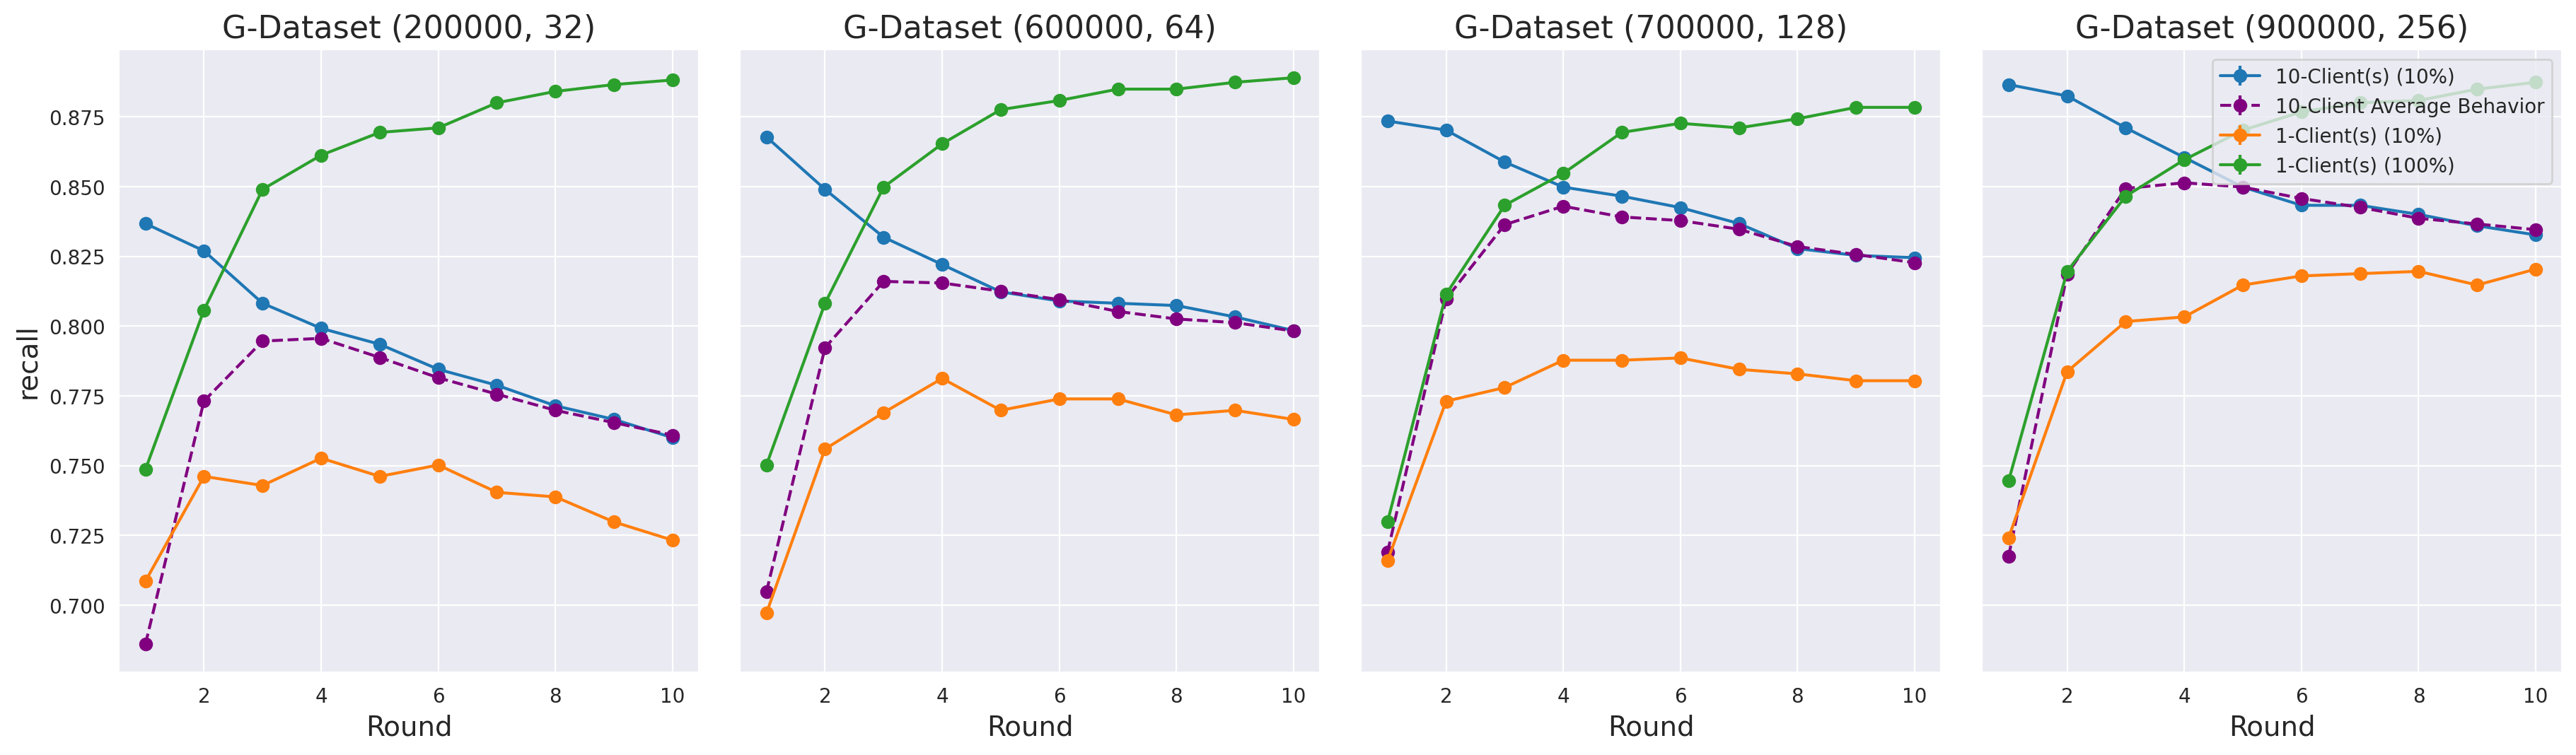

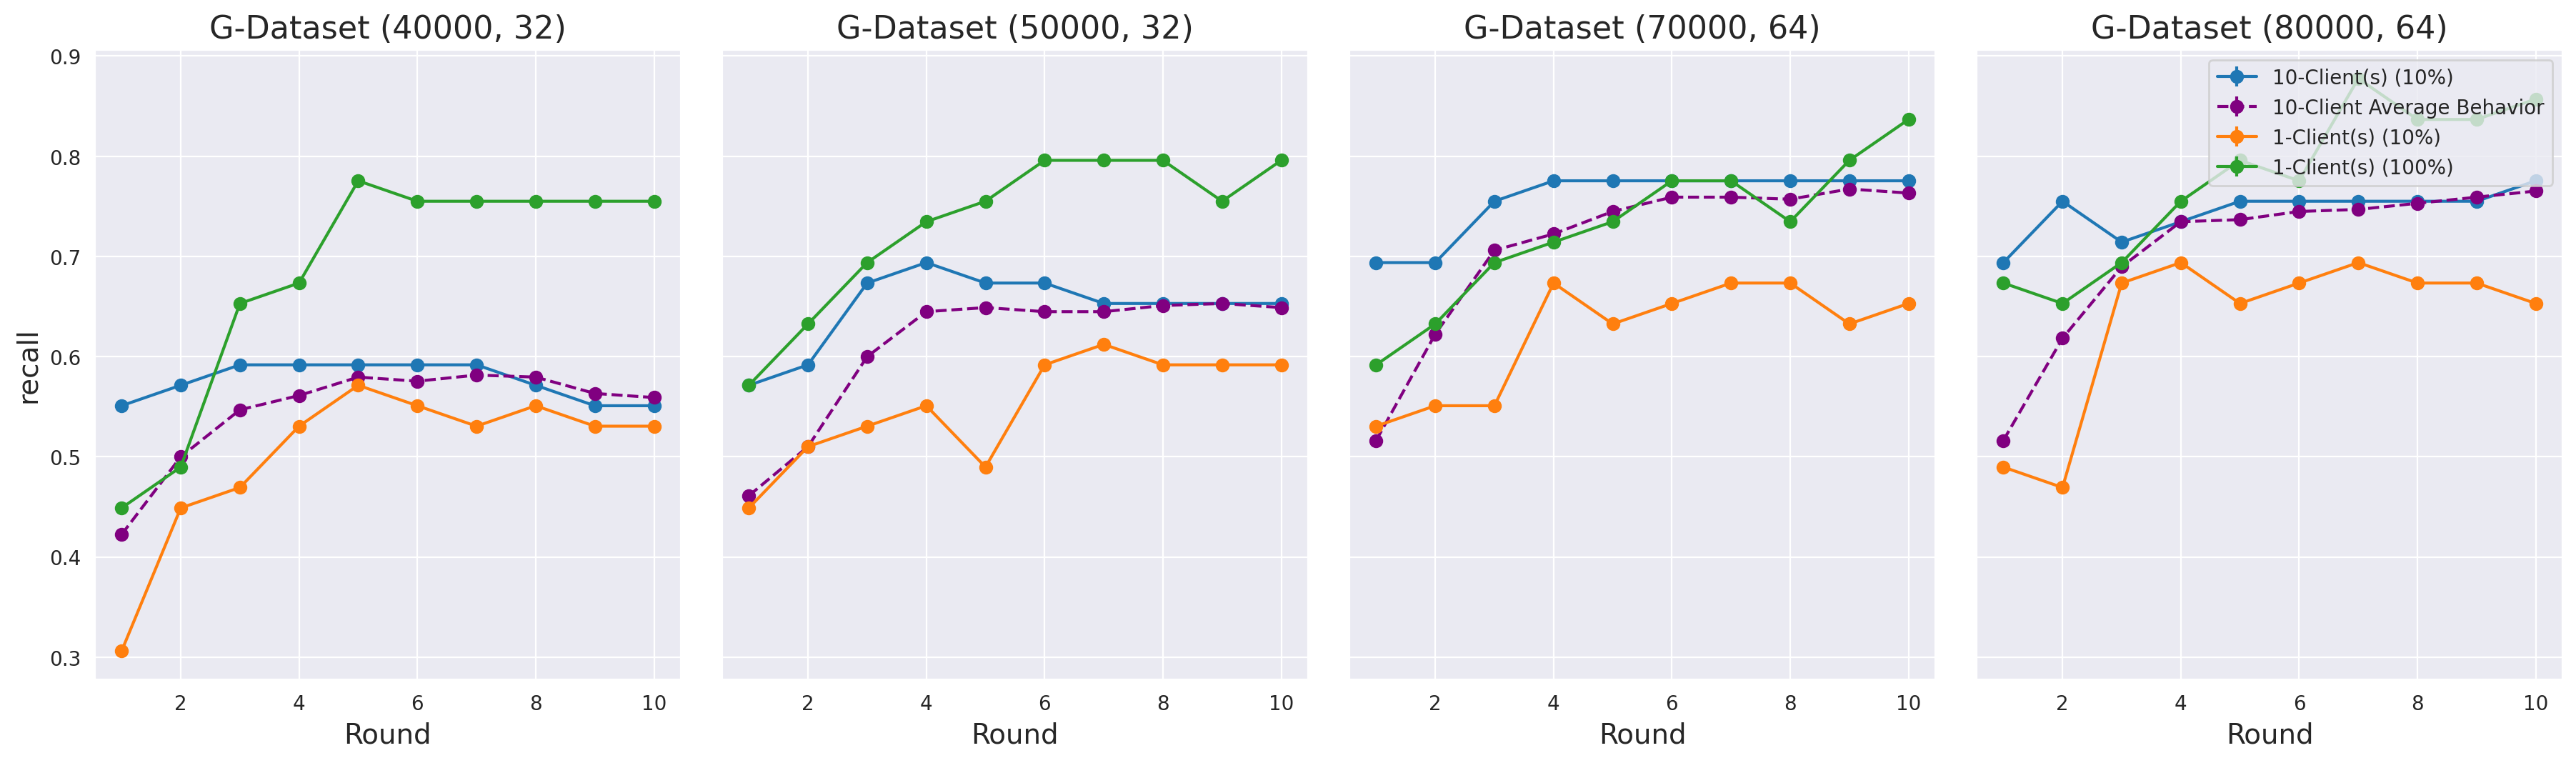

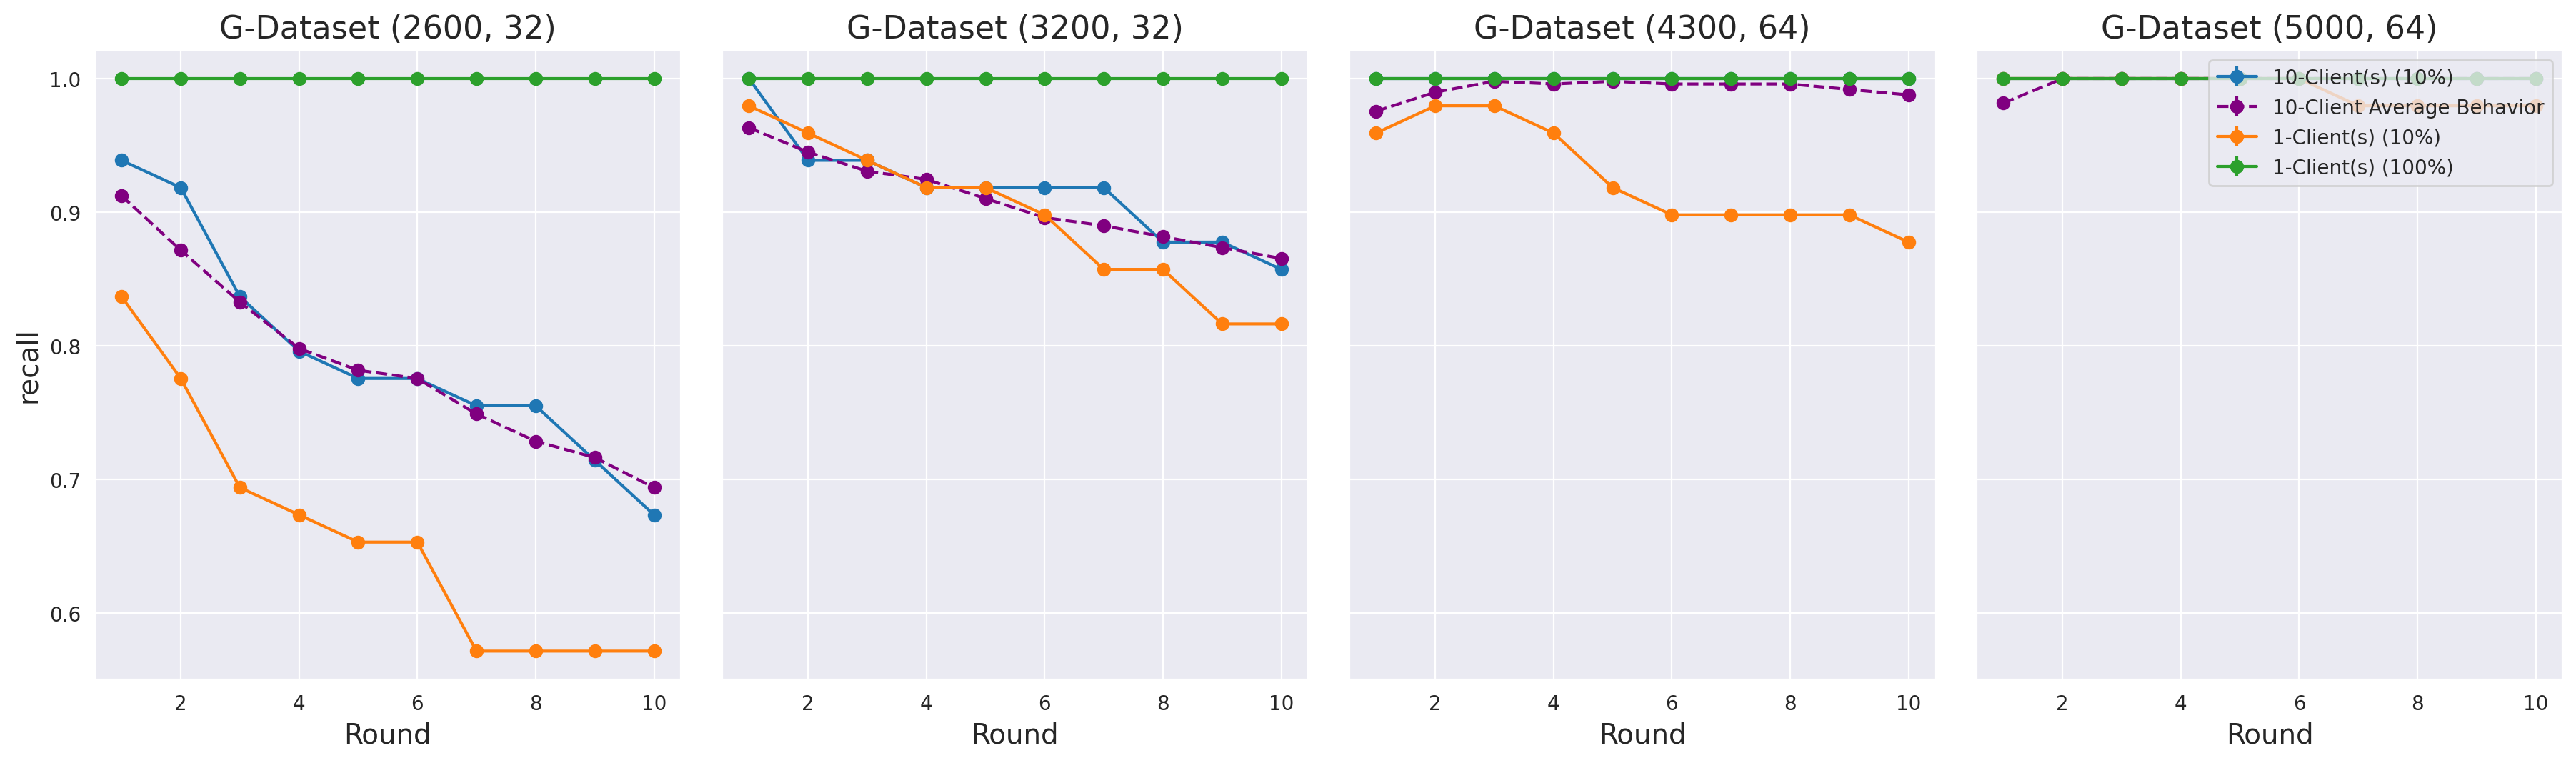

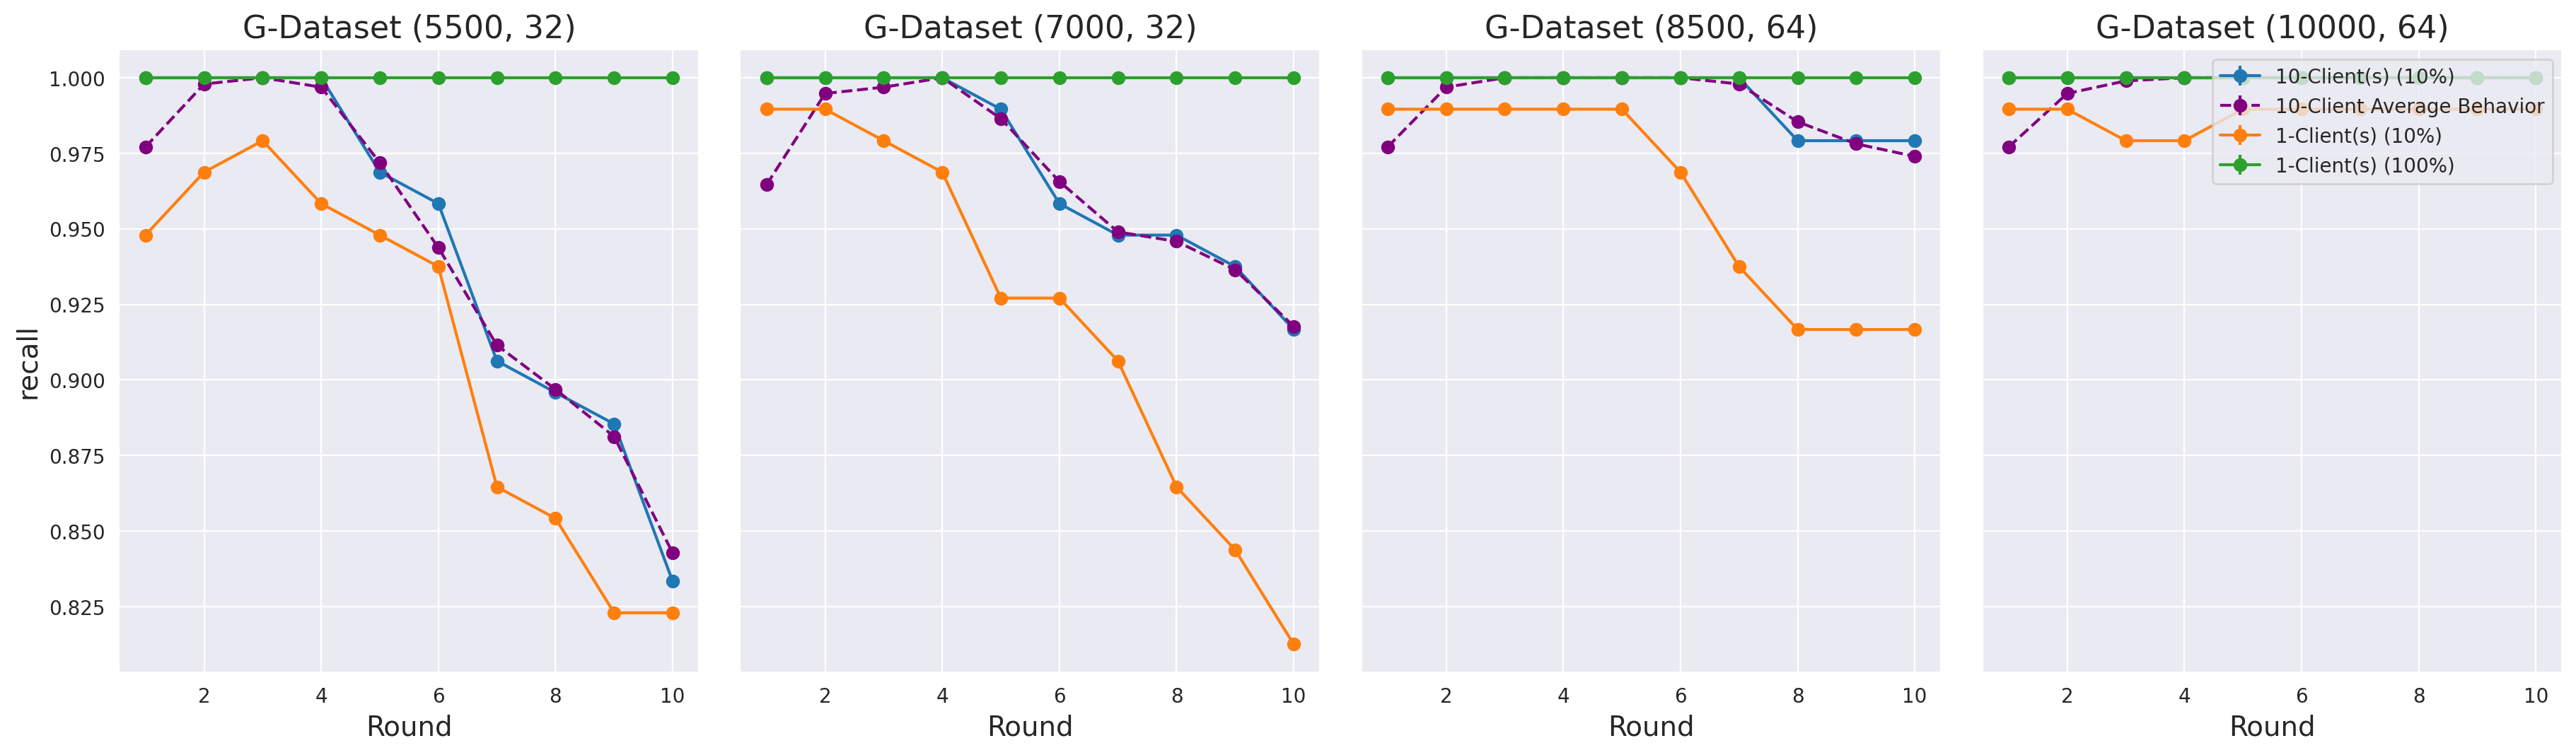

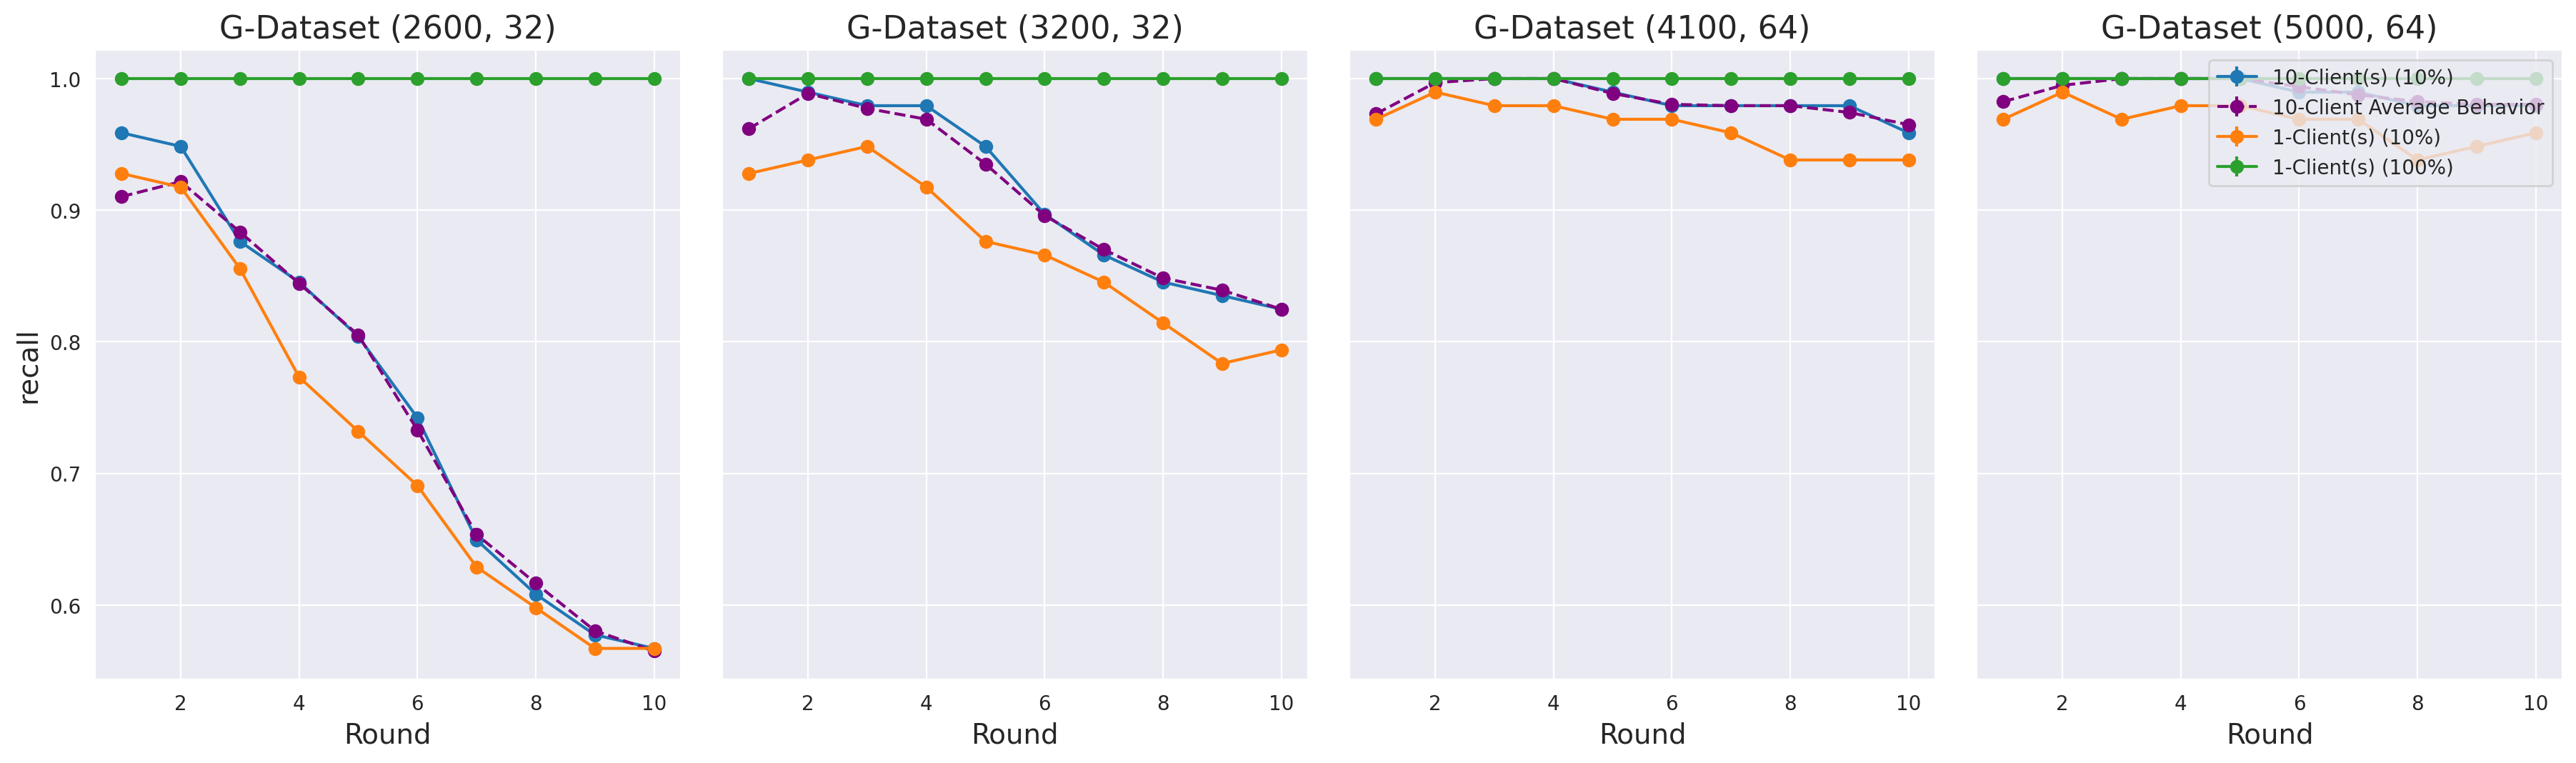

In [5]:
"""
We get a folder structure like this after running the experiments.

Graph10-chain-50/
"""

# Experiments
num_experiments = 12
repeat_count = 1
num_of_rounds = 10

# Graphs
graph_types = ["full", "collider", "chain", "jungle", "bidiag"]
experiment_ids_dict = {"full": [8, 9, 10 , 11],
                       "collider": [7, 8, 10, 11],
                       "chain": [0, 3, 7, 11],
                       "jungle": [3, 4, 7, 10],
                       "bidiag": [0, 3, 10, 11]}

num_vars = 50
num_clients_list = [10, 1, '1x']

# Dataset size
c_num = 10

obs_data_sizes = {"full": [20000 * c_num, 60000 * c_num, 70000 * c_num , 90000 * c_num],
                  "collider": [4000 * c_num, 5000 * c_num, 7000 * c_num, 8000 * c_num],
                  "chain": [260 * c_num, 320 * c_num, 430 * c_num, 500 * c_num],
                  "jungle": [550 * c_num, 700 * c_num, 850 * c_num, 1000 * c_num],
                  "bidiag": [260 * c_num, 320 * c_num, 410 * c_num, 500 * c_num]}

int_data_sizes = {"full": [32, 64, 128, 256],
                  "collider": [32, 32, 64, 64],
                  "chain": [32, 32, 64, 64],
                  "jungle": [32, 32, 64, 64],
                  "bidiag": [32, 32, 64, 64]}

# Miscellaneous
plot_metric = "recall"
std_exageration = 3
parent_folder_name = "str_graphs_final"
plot_average_behavior = True


def retrieve_client_info(stored_results_dict, metric=plot_metric) -> np.ndarray:
    return np.asarray([client_dict[metric] for client_dict in stored_results_dict['priors']])

def retrieve_average_behavior(stored_results_dict, metric=plot_metric) -> np.ndarray:
    avg_metrics = np.zeros(num_of_rounds)
    for client_id in range(num_clients):
        avg_metrics += np.asarray([client_dict[metric] for client_dict in stored_results_dict[client_id]]) / num_clients
    
    return avg_metrics


# list for rounds
rounds = np.arange(start=1, stop=num_of_rounds + 1, step=1)

sns.set_style('darkgrid')
n_col = 4
n_row = 1

for graph_type in graph_types:
    fig, axs = plt.subplots(n_row, n_col, figsize=(18, 5), dpi=200, sharex='all', sharey='all')
    fig.tight_layout(h_pad=2, w_pad=0.5)

    for col, experiment_id in enumerate(experiment_ids_dict[graph_type]):
        ax_col = col
        axs[ax_col].set_title(f'G-Dataset ({obs_data_sizes[graph_type][ax_col]}, {int_data_sizes[graph_type][ax_col]})', fontsize=16)
        
        for num_clients in num_clients_list:
            folder_name = f'Graph{num_clients}-{graph_type}-{num_vars}'

            metrics = list()
            shd_avgs = list()
            for rep_idx in range(repeat_count):
                # Mean on all the repititions

                data_file_name = f'results_{experiment_id}_{rep_idx}.pickle'
                load_dir = os.path.join(os.pardir, 'data', parent_folder_name, folder_name, data_file_name)

                with open(load_dir, 'rb') as handle:
                    results_dict = pickle.load(handle)

                metrics.append(retrieve_client_info(results_dict))
                if num_clients == c_num:
                    shd_avgs.append(retrieve_average_behavior(results_dict))

            metrics_avg = np.mean(np.asarray(metrics), axis=0)
            metrics_std = np.std(np.asarray(metrics), axis=0)

            lab = f'{num_clients}-Client(s) (10%)' if isinstance(num_clients, int) else f'1-Client(s) (100%)'

            
            axs[ax_col].errorbar(rounds, metrics_avg, std_exageration * metrics_std, label=lab,
                                         linestyle='solid', marker='o')
            
            if plot_average_behavior and c_num == num_clients:
                 axs[ax_col].errorbar(rounds, np.mean(np.asarray(shd_avgs), axis=0), 
                                      std_exageration * np.std(np.asarray(shd_avgs), axis=0),
                                      linestyle='dashed', color='purple', marker='o', label=f'10-Client Average Behavior')
                    
    axs[3].legend(loc='upper right')

    axs[0].set_ylabel(plot_metric, fontsize=14)
    for c in range(n_col):
        axs[c].set_xlabel('Round', fontsize=14)


    plt.savefig(f'Final-structured-g{graph_type}-v{num_vars}-m{plot_metric}.png', bbox_inches='tight')

plt.show()


### Random Graphs Experiments


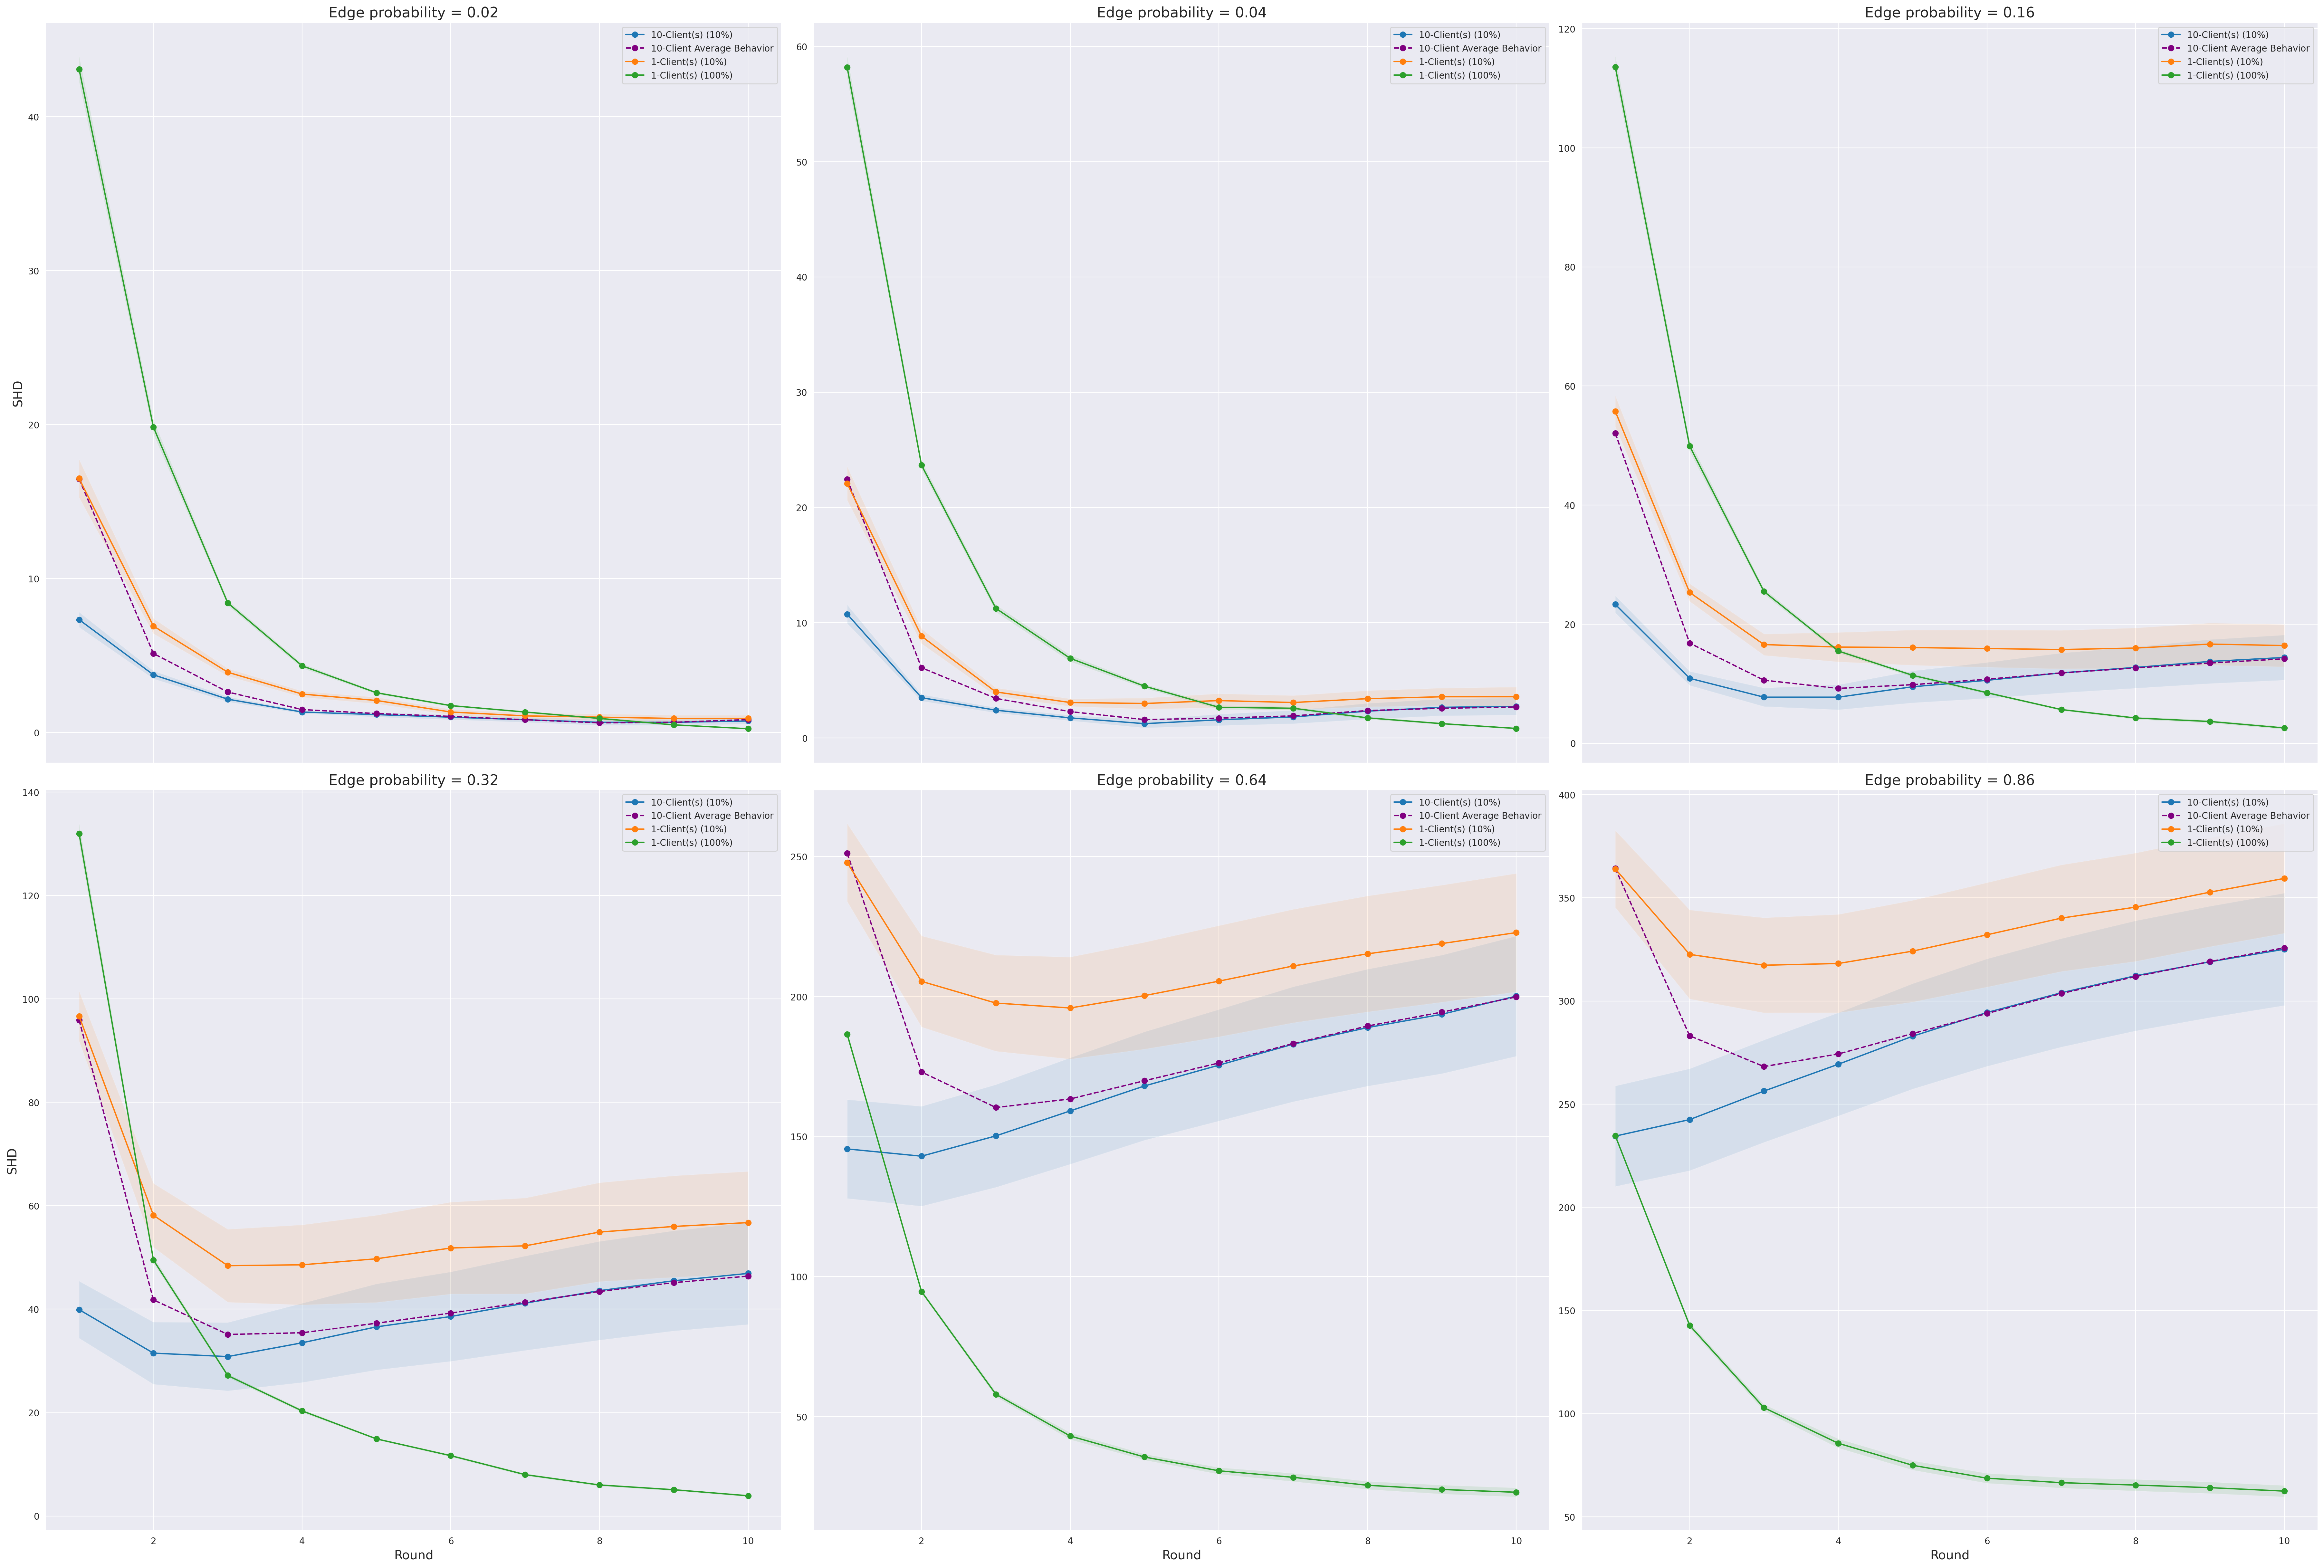

In [28]:
"""
We get a folder structure like this after running the experiments.

Graph10-random0.02-50/
"""

# Experiments
num_experiments = 12
repeat_count = 5
num_of_rounds = 10

# Graphs
graph_type = "random"
num_vars = 50
edge_probs = [0.02, 0.04, 0.16, 0.32, 0.64, 0.8]
num_clients_list = [10, 1, '1x']

# Dataset size
num_clients = 10
obs_data_sizes = [500 * num_clients, 1000 * num_clients, 1500 * num_clients, 
                  2000 * num_clients, 2500 * num_clients, 3000 * num_clients,
                  3500 * num_clients, 4000 * num_clients, 5000 * num_clients,
                  6000 * num_clients, 7000 * num_clients, 8000 * num_clients]

int_data_sizes = [32 * p for p in range(1, 12 + 1)]

# Miscellaneous
plot_metric = "SHD"
std_exageration = 0.1
parent_folder_name = "rnd_graphs"


def retrieve_client_info(stored_results_dict, metric=plot_metric) -> np.ndarray:
    return np.asarray([client_dict[metric] for client_dict in stored_results_dict['priors']])

def retrieve_average_behavior(stored_results_dict, metric=plot_metric) -> np.ndarray:
    avg_metrics = np.zeros(num_of_rounds)
    for client_id in range(num_clients):
        avg_metrics += np.asarray([client_dict[metric] for client_dict in stored_results_dict[client_id]]) / num_clients
    
    return avg_metrics

# A list for rounds
rounds = np.arange(start=1, stop=num_of_rounds + 1, step=1)

n_row = 2
n_col = 3

sns.set_style('darkgrid')

fig, axs = plt.subplots(n_row, n_col, figsize=(36, 24), dpi=200, sharex='all')
fig.tight_layout(h_pad=2, w_pad=0.5)

for idx, edge_prob in enumerate(edge_probs):
    ax_row = idx // n_col
    ax_col = idx % n_col
    axs[ax_row, ax_col].set_title(f'Edge probability = {edge_prob if edge_prob != 0.8 else 0.86}', fontsize=16)

    metrics_1 = list()    
    metrics_1x = list()
    metrics_10 = list()
    shd_avgs_10 = list()

    for experiment_id in range(num_experiments):
        for num_clients in num_clients_list:
            folder_name = f'Graph{num_clients}-{graph_type}{edge_prob}-{num_vars}'
            data_file_name = f'results_{experiment_id}_0.pickle'
            load_dir = os.path.join(os.pardir, 'data', parent_folder_name, folder_name, data_file_name)
            with open(load_dir, 'rb') as handle:
                results_dict = pickle.load(handle)
            
            if num_clients == 1:
                metrics_1.append(retrieve_client_info(results_dict))
            if num_clients == '1x':
                metrics_1x.append(retrieve_client_info(results_dict))
            if num_clients == 10:
                metrics_10.append(retrieve_client_info(results_dict))
                shd_avgs_10.append(retrieve_average_behavior(results_dict))


    for num_clients in num_clients_list:
        metrics_avg = np.zeros(10)
        if num_clients == 1:
            metrics_avg = np.mean(np.asarray(metrics_1), axis=0)
            metrics_std = np.std(np.asarray(metrics_1), axis=0)
        if num_clients == '1x':
            metrics_avg = np.mean(np.asarray(metrics_1x), axis=0)
            metrics_std = np.std(np.asarray(metrics_1x), axis=0)
        if num_clients == 10:
            metrics_avg = np.mean(np.asarray(metrics_10), axis=0)
            metrics_std = np.std(np.asarray(metrics_10), axis=0)

        lab = f'{num_clients}-Client(s) (10%)' if isinstance(num_clients, int) else f'1-Client(s) (100%)'

        axs[ax_row, ax_col].plot(rounds, metrics_avg, label=lab, linestyle='solid', marker='o')
        axs[ax_row, ax_col].fill_between(rounds,
                  [0 if el < 0 else el for el in  metrics_avg - std_exageration * metrics_std],
                  (metrics_avg + std_exageration * metrics_std),
                  alpha=0.1)

        axs[ax_row, ax_col].legend(loc='upper right')

        if num_clients == 10:
             axs[ax_row, ax_col].plot(rounds, np.mean(np.asarray(shd_avgs_10), axis=0),
                                  linestyle='dashed', color='purple', marker='o', label=f'10-Client Average Behavior')
              

    for r in range(n_row):
        axs[r, 0].set_ylabel(plot_metric, fontsize=14)

    for c in range(n_col):
        axs[n_row - 1, c].set_xlabel('Round', fontsize=14)

plt.savefig(f'Sweep-dataset-edge-probabilities.png', bbox_inches='tight')
plt.show()


### Entropy Analysis

Total edges to plot: 256


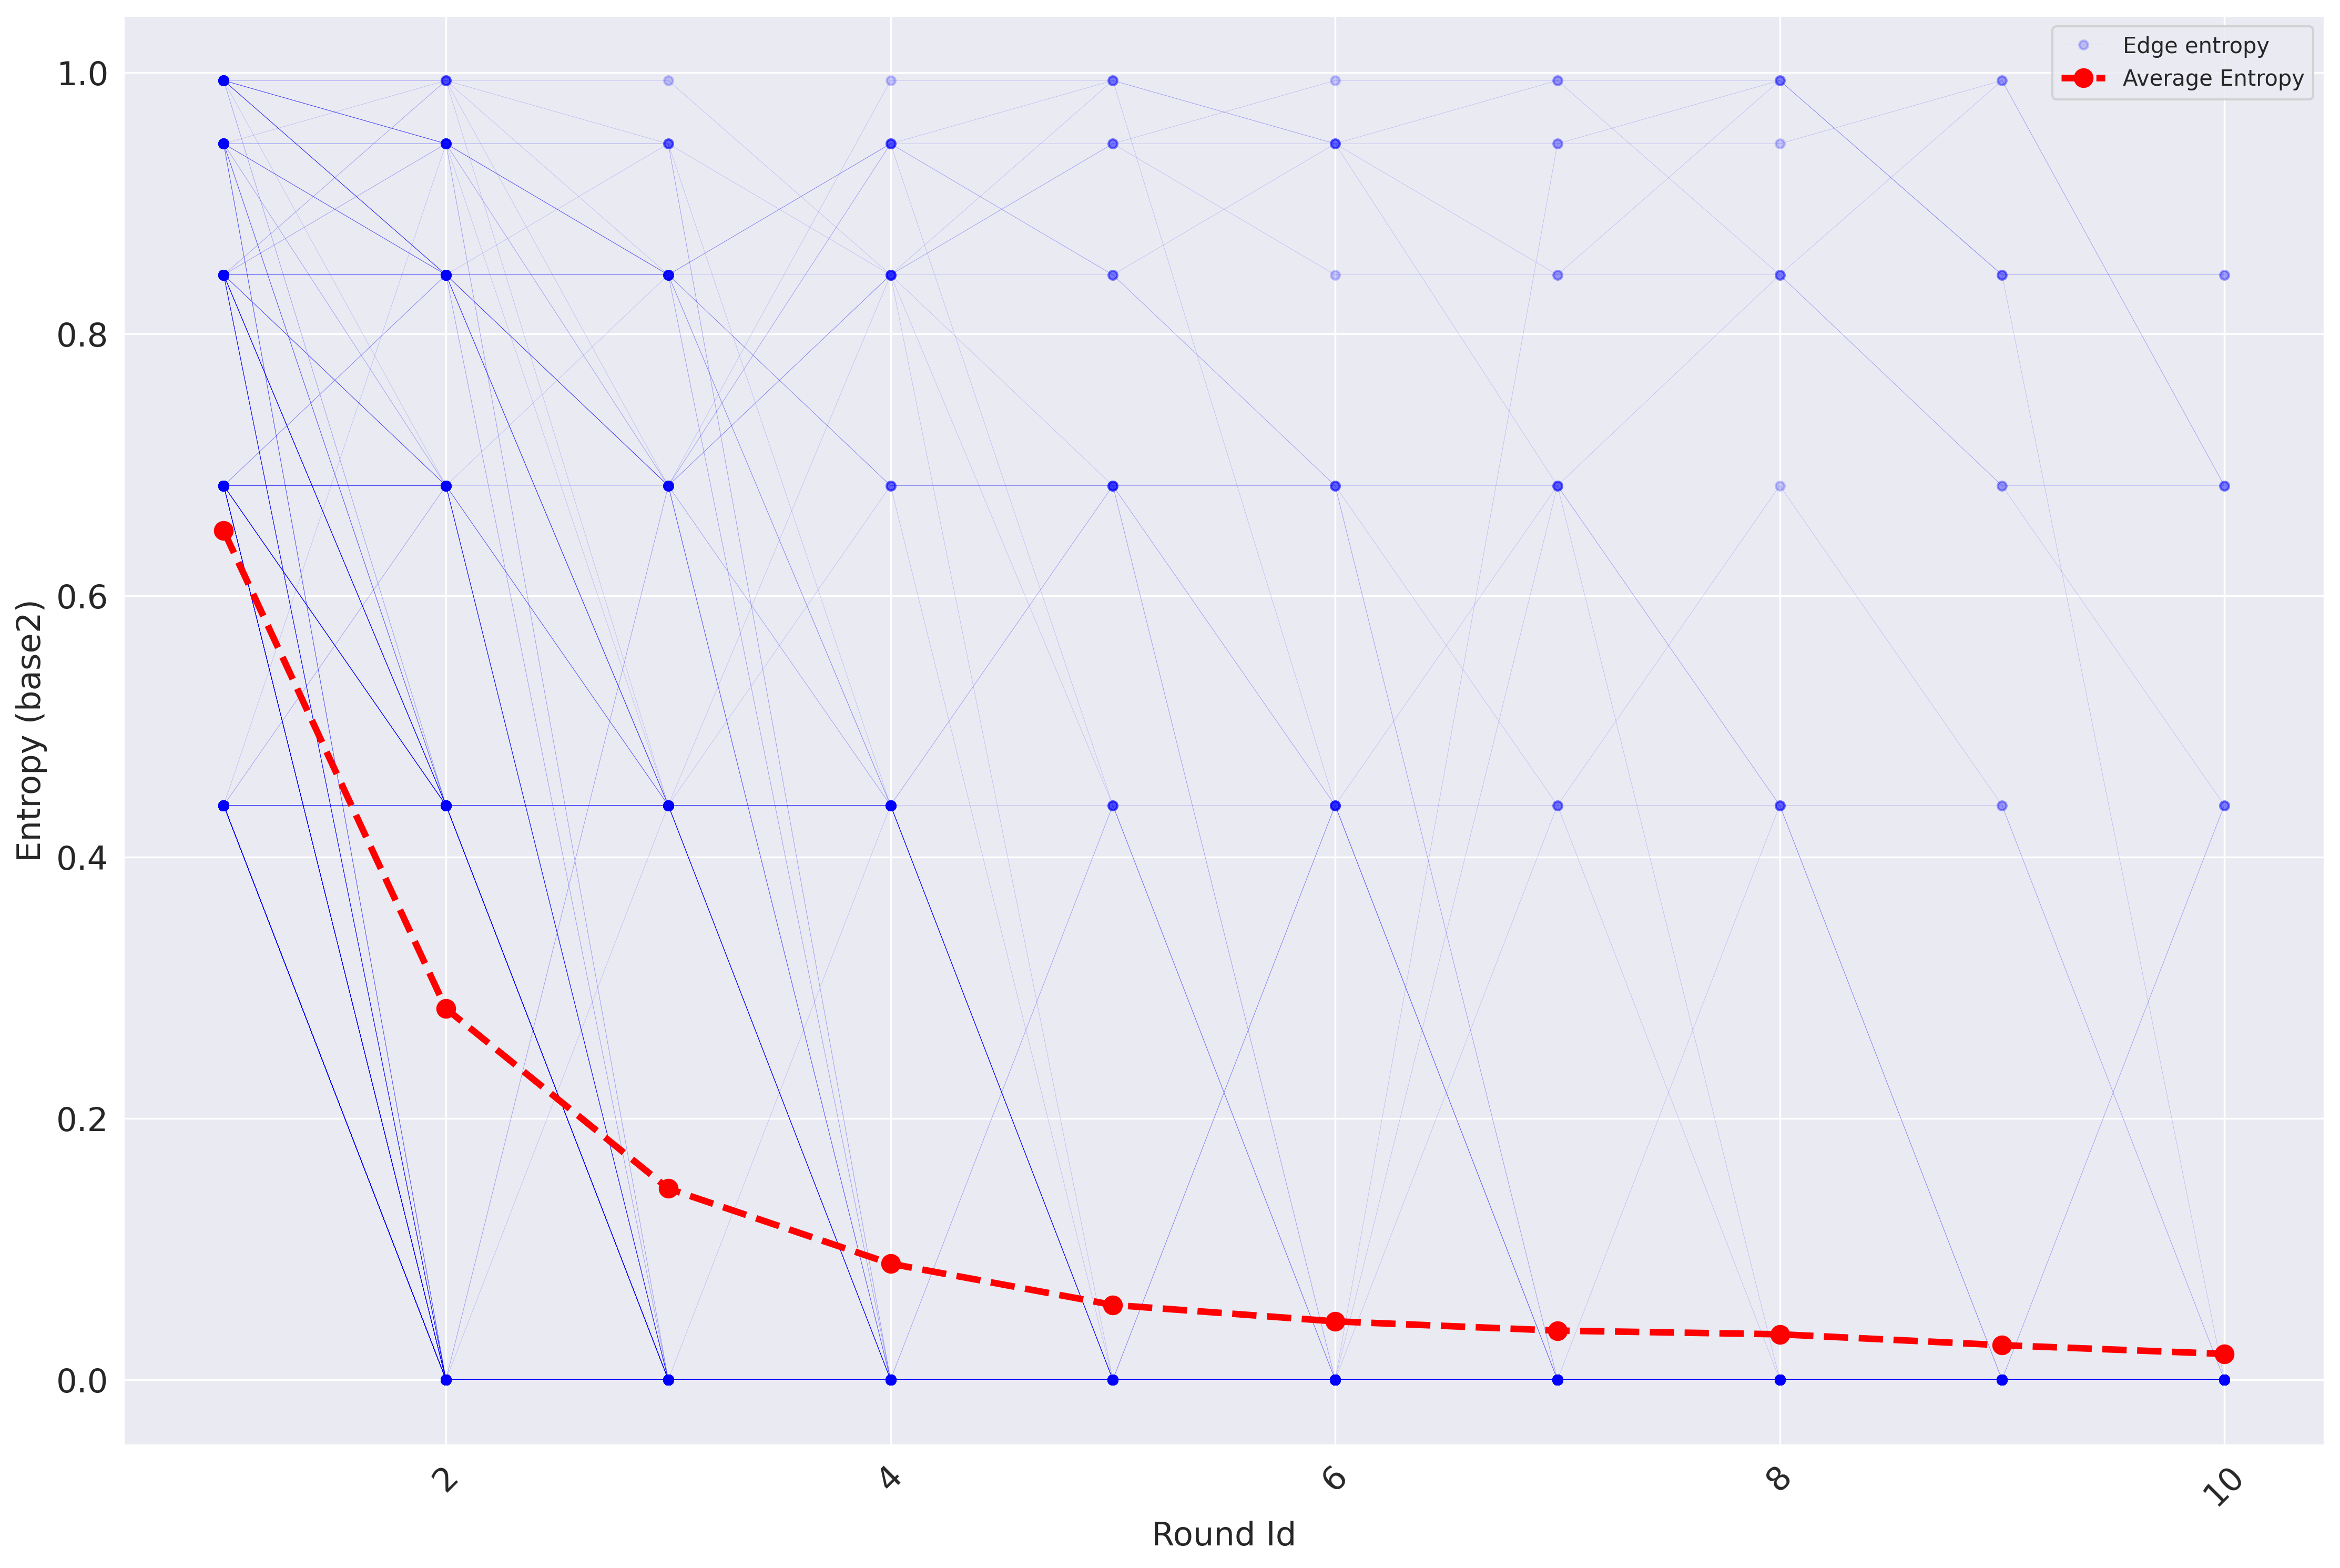

In [13]:
parent_folder_name = 'entropy_tests'
folder_name = 'Graph10-full-30'
data_file_name = 'results_11_0.pickle'


num_rounds = 10
num_clients = 10

load_dir = os.path.join(os.pardir, 'data', parent_folder_name, folder_name, data_file_name)
with open(load_dir, 'rb') as handle:
    results_dict = pickle.load(handle)

entropy_matrices = list()
for round_id in range(num_rounds): 
    entropy_matrices.append(calculate_edge_entropy(results_dict['matrices'][round_id]))

plt.figure(figsize=(18, 12), dpi=300)
sns.set_style("darkgrid")

mat_size = entropy_matrices[0].shape[0]
entropy_vals = [mat.ravel() for mat in entropy_matrices]
plot_mat = np.stack((entropy_vals)).T

rounds = [round_id for round_id in range(1, 10 + 1)]
rows = [row for row in range(mat_size * mat_size) if row % mat_size > mat_size / 2 and np.average(plot_mat[row]) > 0.01]
print(f'Total edges to plot: {len(rows)}')

label='Edge entropy'
for row in rows:
    plt.plot(rounds, plot_mat[row], color='blue', marker='o', markersize=4, alpha=0.2, linewidth=0.2, label=label)
    label='_nolegend_'
    
avgs_entropy = np.average(plot_mat[rows], axis=0)
stds_entropy = np.std(plot_mat[rows], axis=0)

plt.errorbar(rounds, avgs_entropy, color='red', marker='o', markersize=8, linewidth=3, linestyle='dashed')

set_plot_styles(title="", x_label='Round Id', y_label='Entropy (base2)', save_file_name=f'Entropy_{folder_name}_dots.png',
                    legend_location='upper right', legend_labels=['Edge entropy', 'Average Entropy'])

Total edges to plot: 1044
Total edges to plot: 18
Total edges to plot: 32
Total edges to plot: 45
Total edges to plot: 42


<Figure size 5400x3600 with 0 Axes>

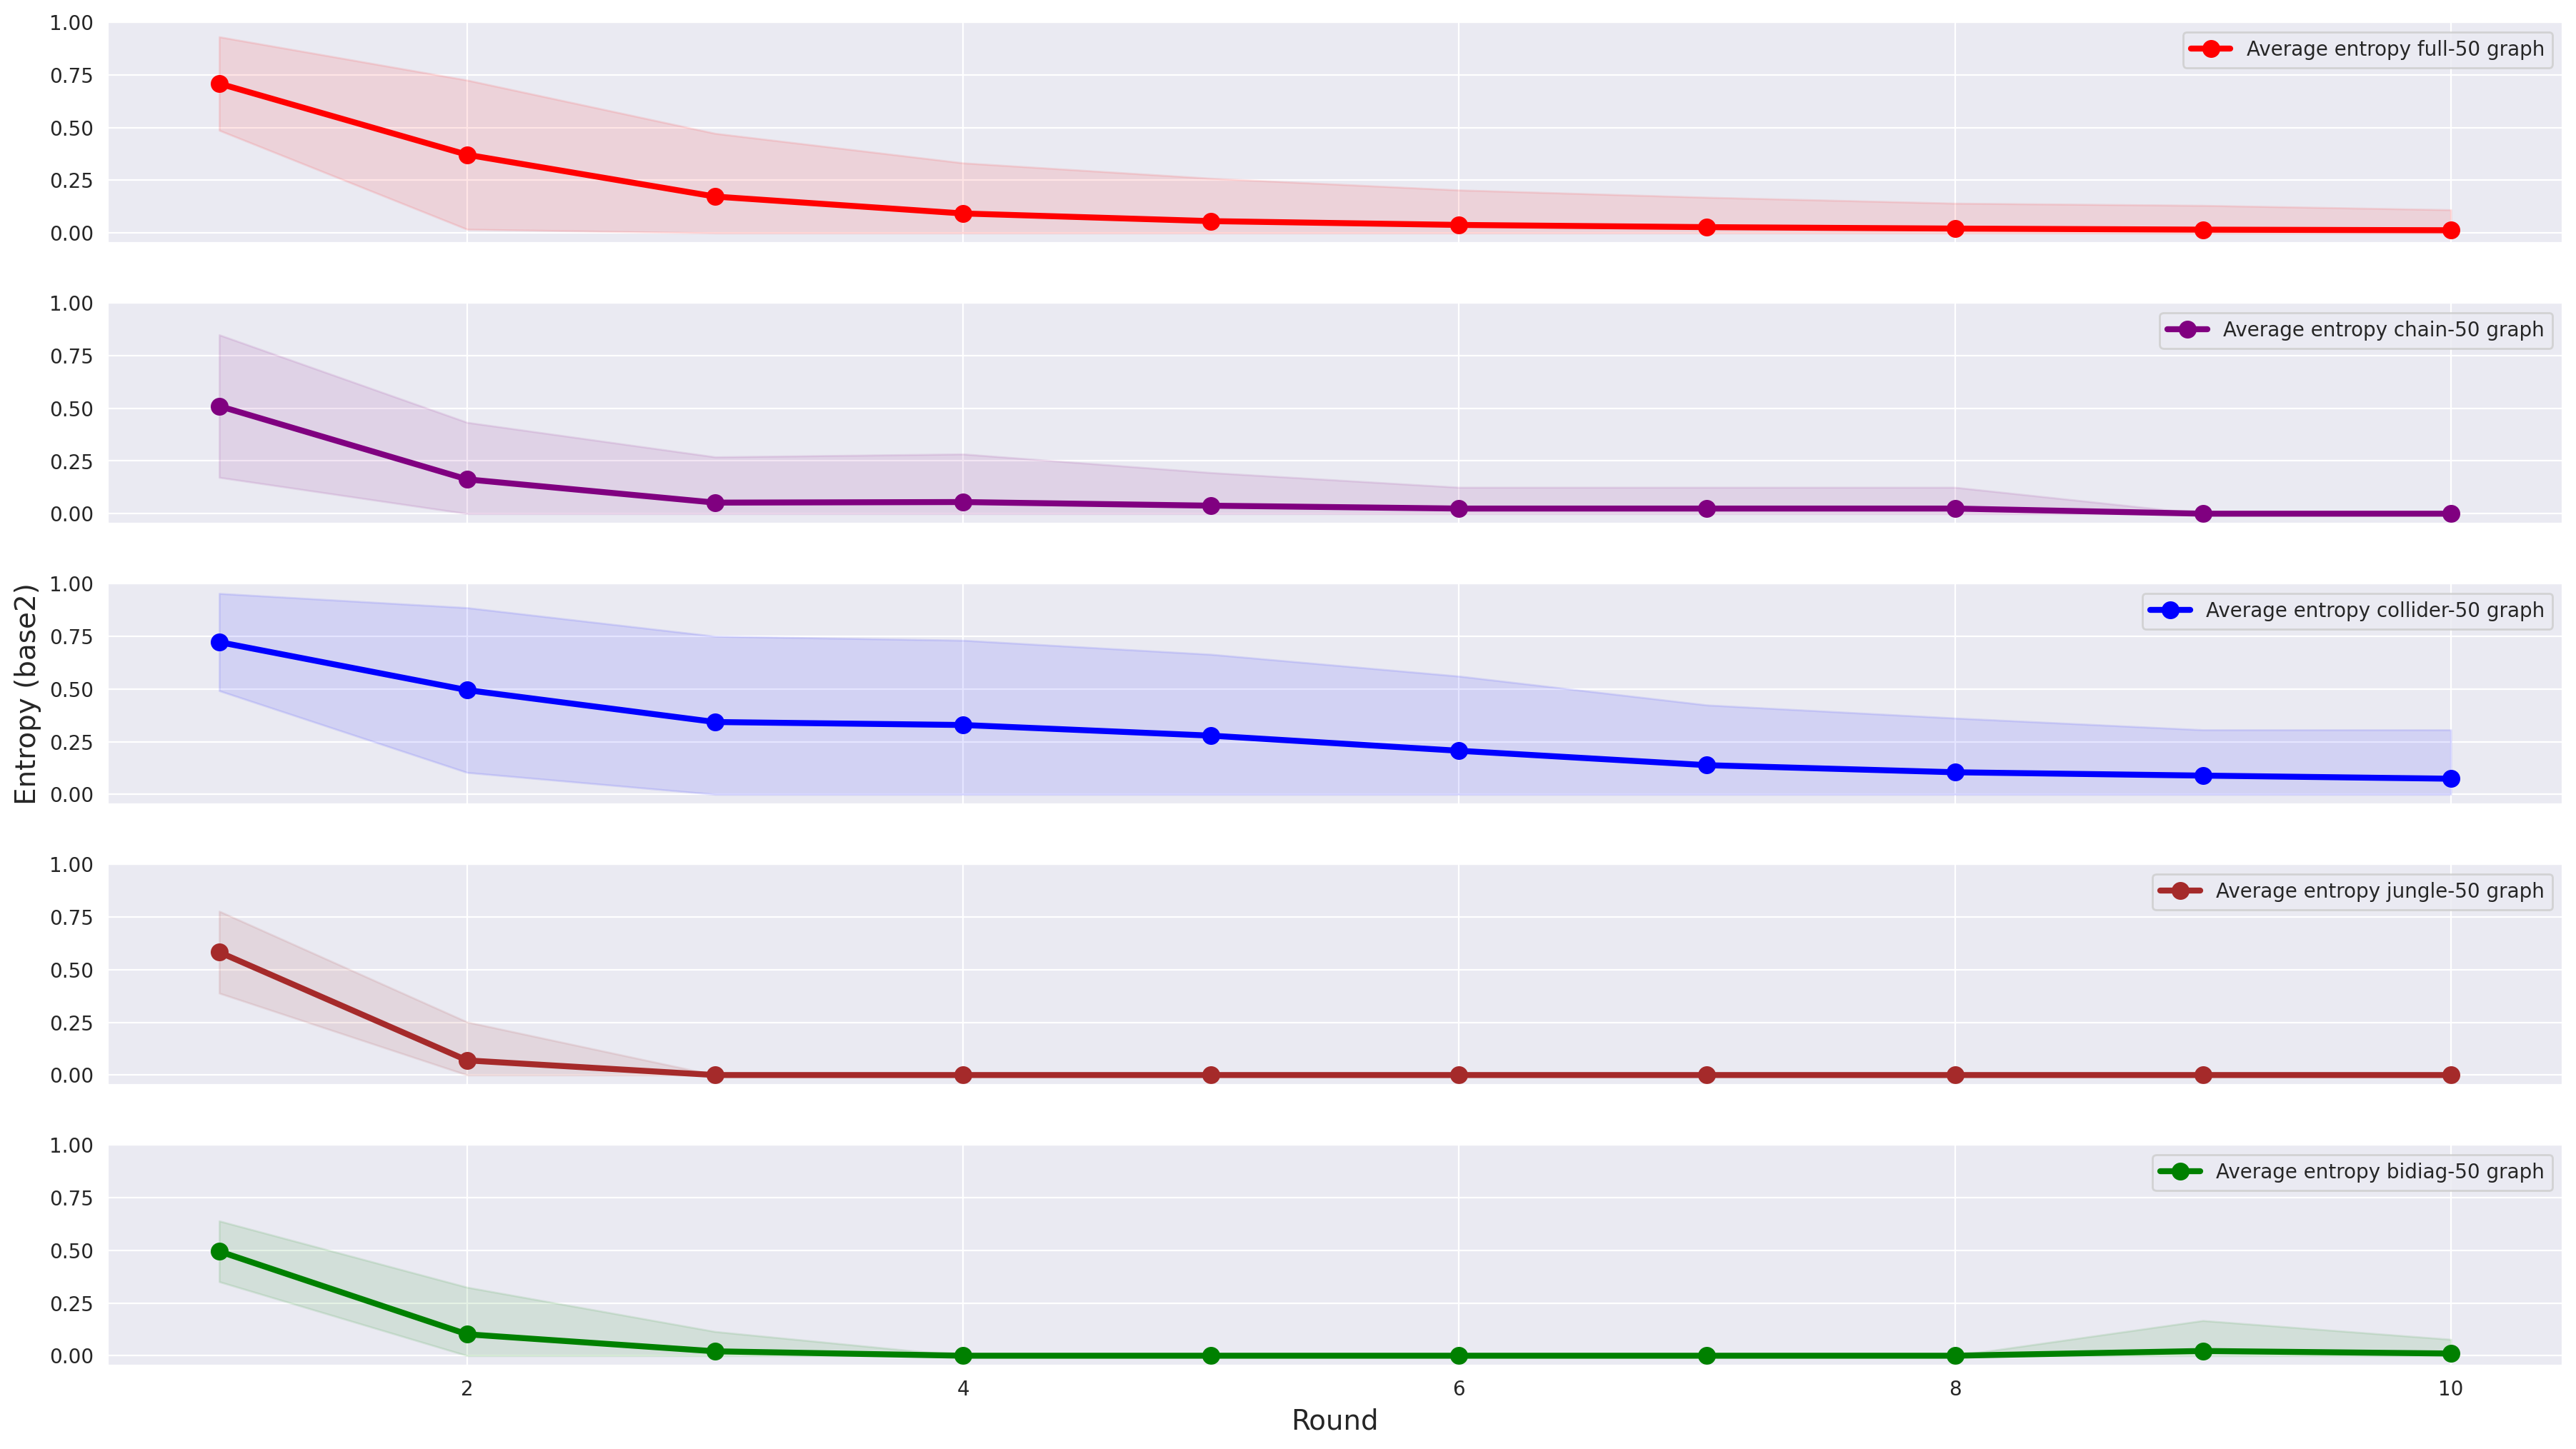

In [20]:
plt.figure(figsize=(18, 12), dpi=300)
sns.set_style("darkgrid")

parent_folder_name = 'entropy_tests'

num_rounds = 10
num_clients = 10

fig, axs = plt.subplots(5, 1, figsize=(18, 10), dpi=200, sharex='all', sharey='all')
fig.tight_layout(h_pad=2, w_pad=0.5)

colors = ['red', 'purple', 'blue', 'brown', 'green']
for idx, graph_type in enumerate(["full", "chain", "collider", "jungle", "bidiag"]):
    folder_name = f'Graph10-{graph_type}-50'

    data_file_name = 'results_4_0.pickle'
    if graph_type == 'bidiag':
        data_file_name = 'results_10_0.pickle'
    load_dir = os.path.join(os.pardir, 'data', parent_folder_name, folder_name, data_file_name)
    with open(load_dir, 'rb') as handle:
        results_dict = pickle.load(handle)

    entropy_matrices = list()
    for round_id in range(num_rounds): 
        entropy_matrices.append(calculate_edge_entropy(results_dict['matrices'][round_id]))

    mat_size = entropy_matrices[0].shape[0]
    entropy_vals = [mat.ravel() for mat in entropy_matrices]
    plot_mat = np.stack((entropy_vals)).T

    rounds = [round_id for round_id in range(1, 10 + 1)]
    rows = [row for row in range(mat_size * mat_size) if row % mat_size > mat_size / 2 and np.average(plot_mat[row]) > 0.01]
    print(f'Total edges to plot: {len(rows)}')

    avgs_entropy = np.average(plot_mat[rows], axis=0)
    stds_entropy = np.std(plot_mat[rows], axis=0)
    
    axs[idx].plot(rounds, avgs_entropy, marker='o', color=colors[idx], markersize=8, linewidth=3, label=f'Average entropy {graph_type}-50 graph')
    axs[idx].fill_between(rounds,
                     [0 if el < 0 else el for el in avgs_entropy - stds_entropy],
                     (avgs_entropy + stds_entropy),
                      alpha=0.1, color=colors[idx])

    axs[2].set_ylabel("Entropy (base2)", fontsize=14)
    axs[idx].legend(loc='upper right')
    axs[4].set_xlabel('Round', fontsize=14)

    plt.savefig(f'Entropy-Analysis-All-Graphs.png', bbox_inches='tight')

plt.show()